In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, balanced_accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
data = pd.read_csv('creditcard.csv')

In [16]:
data.shape

(284807, 31)

---

In [17]:
X = data.iloc[:, :30]
y = data.iloc[:, 30]

In [18]:
X.shape

(284807, 30)

In [19]:
y.shape

(284807,)

---

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [21]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [22]:
X_test.shape, y_test.shape

((56962, 30), (56962,))

---

In [40]:
algos = [KNeighborsClassifier, LogisticRegression, GaussianNB, BernoulliNB, DecisionTreeClassifier, RandomForestClassifier]

In [41]:
algos_title = ['KNN', 'LR', 'GNB', 'BNB', 'DTree', 'RFC']

In [43]:
accuracy_scores = []
bal_accuracy_scores = []
precision_scores = []

tprs = []
fprs = []
tnrs = []
fnrs = []

In [44]:
for algo in algos:
    if algo == RandomForestClassifier:
        model = RandomForestClassifier(n_estimators=10)
    elif algo == KNeighborsClassifier:
        model = KNeighborsClassifier(n_neighbors=50)
    else:
        model = algo()
        
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print('\n\n------ ', type(model),' ------')
    
    acc_score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc_score)
    # print(acc_score)
    
    bal_score = balanced_accuracy_score(y_test, y_pred)
    bal_accuracy_scores.append(bal_score)
    # print(bal_score)
    
    prec_score = precision_score(y_test, y_pred)
    precision_scores.append(prec_score)
    # print(prec_score)
    
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(cr)
    print(cm)
    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tn = cm[1,1]
    
    tpr = tp/(tp+fp)
    tprs.append(tpr)
    # print('tpr',tpr)
        
    fpr = fp/(tp+fp)
    fprs.append(fpr)
    # print('fpr',fpr)
    
    tnr = tn/(tn+fp)
    tnrs.append(tnr)
    # print('tnr',tnr)
    
    fnr = fn/(fn+tp)
    fnrs.append(fnr)
    # print('fnr',fnr)
    
    ac = (tp+tn)/(tp+tn+fp+fn)
    print('accuracy',ac)






------  <class 'sklearn.neighbors.classification.KNeighborsClassifier'>  ------


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

[[56866     0]
 [   96     0]]
accuracy 0.9983146659176293


------  <class 'sklearn.linear_model.logistic.LogisticRegression'>  ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.62      0.69        96

    accuracy                           1.00     56962
   macro avg       0.88      0.81      0.84     56962
weighted avg       1.00      1.00      1.00     56962

[[56848    18]
 [   36    60]]
accuracy 0.9990519995786665


------  <class 'sklearn.naive_bayes.GaussianNB'>  ------
              precision    recall  f1-score   support

           0       1.00      0.99    

In [45]:
algos_title, accuracy_scores

(['KNN', 'LR', 'GNB', 'BNB', 'DTree', 'RFC'],
 [0.9983146659176293,
  0.9990519995786665,
  0.9928899968399986,
  0.9988237772550121,
  0.9988413328183702,
  0.9993504441557529])

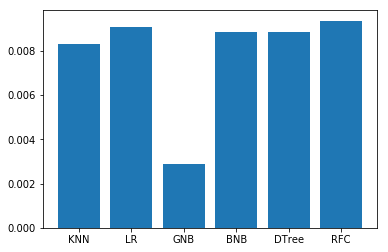

In [47]:
plt.bar(algos_title, [(i-0.99) for i in accuracy_scores])
plt.show()

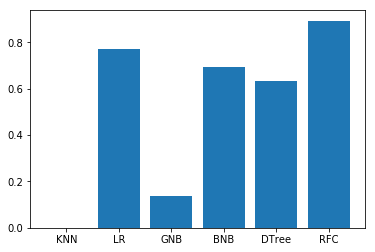

In [49]:
plt.bar(algos_title, precision_scores)
plt.show()

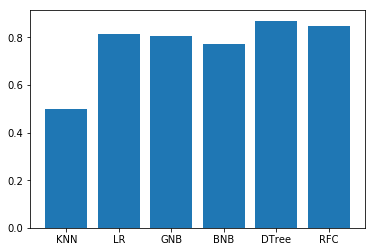

In [50]:
plt.bar(algos_title, bal_accuracy_scores)
plt.show()

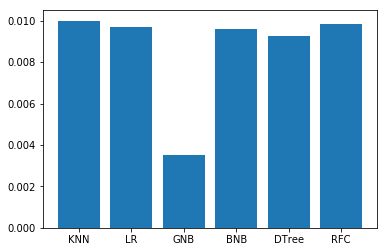

In [52]:
plt.bar(algos_title, [(i-0.99) for i in tprs])
plt.show()

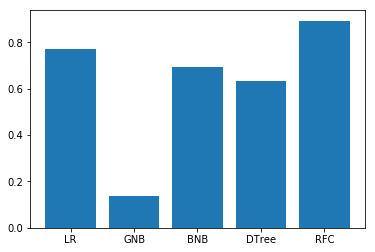

In [59]:
plt.bar(algos_title, tnrs)
plt.show()